In [1]:
class solution:
    def p(self, A, K):
        
        d = collections.deque([[0, 0]])
        res, cur = float('inf'), 0
        
        B = [0]
        for a in A: B.append(B[-1] + a)
        
        pic_count=1
        
        for i, a in enumerate(A):
            
            cur += a
            
            f = plt.figure(figsize=(18,5))
            
            chart_l(B, 
                    i + 1, 
                    f.add_subplot(141), 
                    'arr: current index ' + str(i + 1), 
                    'minSubstring'+': '+str(res))
            
            newd=d + collections.deque([[len(d), cur]])
            before_c_deque_vals = get_deque_values(newd)
            before_chart(f.add_subplot(142), before_c_deque_vals, len(d), cur)
            
            while d and cur <= d[-1][1]:
                d.pop()
            
            while d and cur - d[0][1] >= K:
                res = min(res, i + 1 - d.popleft()[0])
            
            d.append([i + 1, cur])

            plt.show()
            f.savefig('862_' + str(pic_count) + '.png', bbox_inches='tight',dpi=200)
            pic_count+=1
            
        f = plt.figure(figsize=(18,5))
        rr=(res if res < float('inf') else -1)
        t='minSubstring'+ ': ' + str(rr)
        chart_l(B, -1, f.add_subplot(141), 'arr: end',t)
        before_chart(f.add_subplot(142), get_deque_values(d), -1, None)
#         f.savefig('862_' + str(pic_count) + '.png', bbox_inches='tight',dpi=200)


def show_chart():
    s = solution()
    vals = [84,-37,32,40,95]
    s.p(vals, 167)
    

show_chart()

NameError: name 'collections' is not defined

In [94]:
import collections
import matplotlib.pyplot as plt

c_grey = 'silver'
c_red = 'salmon'
c_blue = 'dodgerblue'
c_green = 'mediumaquamarine'
c_yellow = 'gold'

def save(f,name,count,dpi=200):
    f.savefig(name + '_' + str(count) + '.png', bbox_inches='tight',dpi=dpi)
    
def get_indexes(values):
    return [i for i in range(len(values))]
    
def add_dynamic_text(plt, text_to_display, max_value):
    if text_to_display: plt.text(-0.5, max_value, text_to_display)
        
def set_x_label(plt, xlabel):
    if xlabel: plt.set_xlabel(xlabel)
        
def get_deque_values(d):
    return [i[1] for i in list(d)]
    
def set_x_legend(subplt, cur_value):
    if cur_value is not None: subplt.set_xlabel('queue | going to add ' + str(cur_value))
    else: subplt.set_xlabel('queue | end')

def create_fig():
    fig=plt.figure(figsize=(14,6))
    fig.tight_layout()
    return fig

def create_one_two_chart(f=create_fig(),place=121,ylim_min=0,ylim_max=0):
    a=f.add_subplot(place)
    a.set_ylim(ylim_min, ylim_max+20)
    return a

def draw_arrow(ax, start_val, end_val, start_ind, end_ind, arr_length):
    minArrLength = 1
    # min - when the diff between indexes is minimal = 1
    minAngleA = 85
    minAngleB = 125
    # max - when the diff between indexes is maximum = arr_length
    maxAngleA = 20
    maxAngleB = 170
    
    #diffLen/totalLen
    part=(((end_ind - start_ind)-minArrLength)/(arr_length-minArrLength-1))
    # resA/angleSize=diffLen/totalLen
    resA=minAngleA - ((minAngleA-maxAngleA)*part)
    resB=minAngleB + ((maxAngleB-minAngleB)*part)
    cs='angle3,angleA='+str(resA)+',angleB='+str(resB)
    #-(44)*(end_ind-start_ind), -((end_val-5)-start_val)-15)
    
    ax.annotate('', 
                xy=(end_ind, (end_val)+5), 
                xycoords='data', 
                xytext=(start_ind, start_val + 5),
                arrowprops=dict(arrowstyle="->", connectionstyle=cs))

def draw_all_arrows(axes, input_array):
    
    arr_length = len(input_array)
    result_indexes = dailyTemperatures_indexes(input_array)
    
    # use counter to gradually raise y of end of arrow
    seen_indexes_count = [0 for i in range(arr_length)]
    
    for i in range(arr_length):
        
        # draw arrow for every bar that has a nearest value
        if result_indexes[i] != -1:
            
            start_val=input_array[i]
            end_val=input_array[result_indexes[i]] + seen_indexes_count[result_indexes[i]]
            start_ind=i
            end_ind=result_indexes[i]
            
            draw_arrow(axes, start_val, end_val, start_ind, end_ind, arr_length)
            seen_indexes_count[result_indexes[i]]+=2

def draw_legend(axes,txt):
    axes.legend(txt, loc='upper left')

def draw_x_axis_legend(axes,xs,ys):
    for x,y in zip(xs,ys):
        axes.annotate(y, (x,y), textcoords="offset points", xytext=(0,(-15 if y<0 else 3)), ha='center')

def draw_single_bar(axes, index, values, total_values_count):#, c=c_red
    w=0.9
    if total_values_count == 1: 
        axes.set_xlim(-1, 1)
        w=0.6
#     if total_values_count==2:
#         axes.set_xlim(-1.5,3.5)
#     elif total_values_count == 2: axes.set_xlim(-0.5, 1.5)
    axes.bar([index], values, width = w, color=c_red)
    draw_x_axis_legend(axes, [index], values)

def draw_bar_chart(axes,indexes,values,c=c_blue,nolegend=False):#,c=c_blue
    if not values: return
    w=0.9
#     add_dynamic_text(axes, text_to_display, max(values))
#     set_x_label(axes, xlabel)
#     set_x_legend(axes, cur_value)
    if nolegend:
        axes.bar(indexes,values,width=w,color=c, label='_nolegend_')
    else:
        axes.bar(indexes,values,width=w,color=c)        
    draw_x_axis_legend(axes,indexes,values) 

<Figure size 1008x432 with 0 Axes>

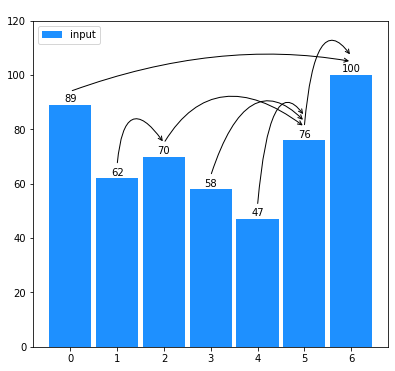

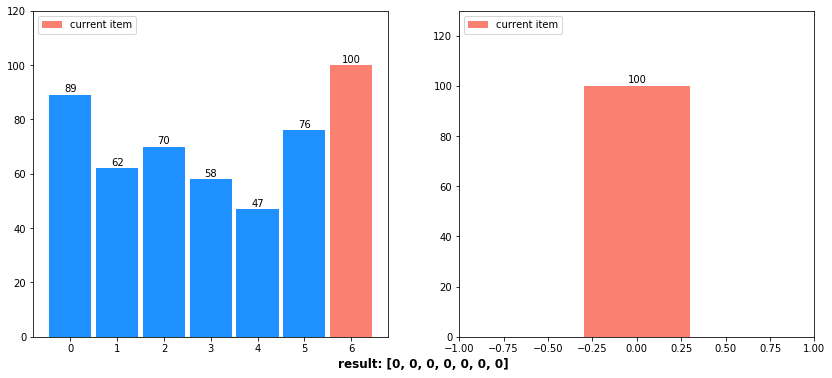

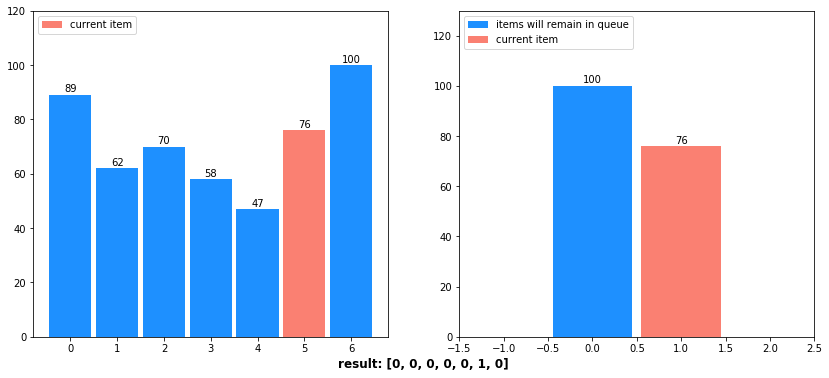

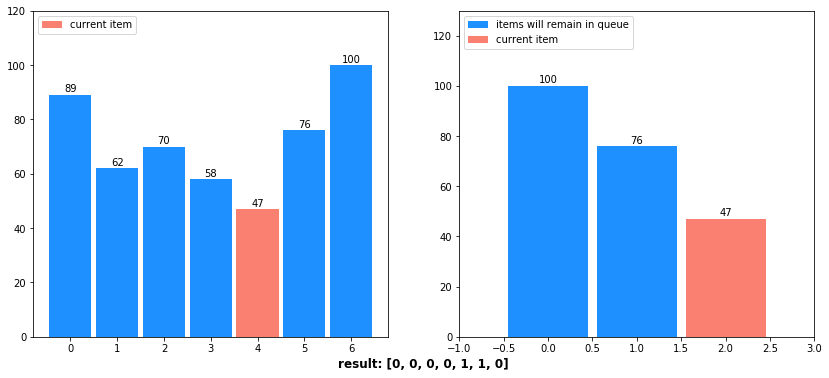

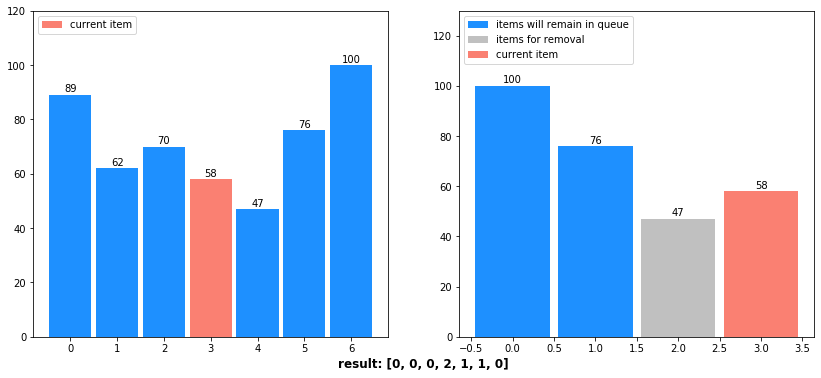

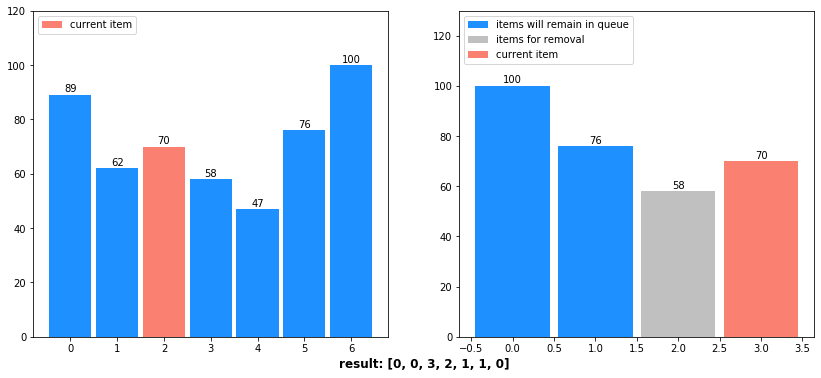

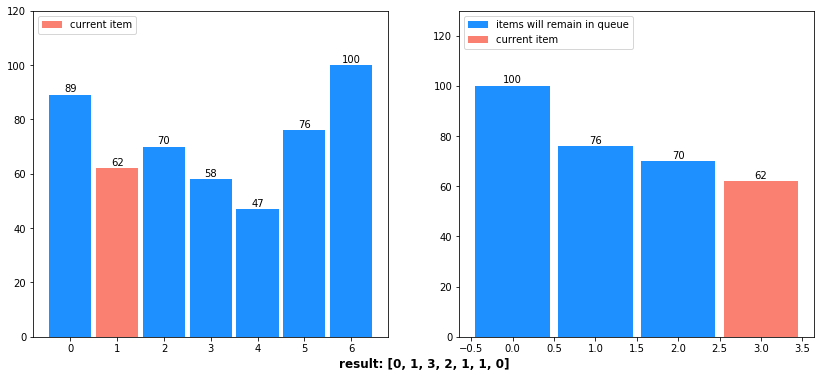

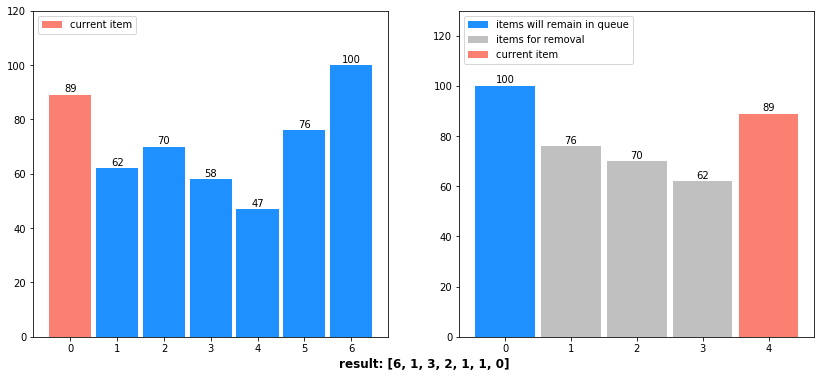

In [96]:
# definitions:
## axes: x and y axes
from matplotlib.patches import Ellipse

def dailyTemperatures_indexes(T):
    stack = []
    res = [-1 for i in range(len(T))]
    for index in range(len(T) - 1, -1, -1):
        while stack and T[stack[-1]] <= T[index]: stack.pop()
        if stack: res[index] = stack[-1]
        stack.append(index)
    return res

def get_array_except_index(a,i):
    res=a[:i]
    res.extend(a[i+1:])
    return res

def get_array_except_range(a,i,j):
    res=a[:i]
    res.extend(a[j:])
    return res

def get_array_only_indexes(a,i,j):
    return a[i:j+1]
    
def dailyTemperatures(input_array):
    
    pic_count=0
    fontdictx={'fontsize': 12, 'weight':'bold', 'horizontalalignment': 'center'}
    stack=[]
    result=[0 for i in range(len(input_array))]
    max_array_value=max(input_array)
    n=len(input_array)
    
    ############ bar chart ############
    
    f1 = create_fig()
    axes = create_one_two_chart(f1,121,ylim_max=max_array_value)
    draw_bar_chart(axes, get_indexes(input_array), input_array)
    draw_all_arrows(axes, input_array)
    draw_legend(axes, ['input'])
    save(f1,'temp',pic_count,dpi=100)
    pic_count+=1
    ############ bar chart ############
    
    for index in range(len(input_array) - 1, -1, -1):
        
        ############ bar chart ############
        
        f = create_fig()
        
        # draw left chart
        axes_left=create_one_two_chart(f,121,ylim_max=max_array_value)
        
        draw_single_bar(axes_left, 
                        index, 
                        [input_array[index]], 
                        n)
        
        # remove value at index from array
        sliced_array_indexes=get_array_except_index(get_indexes(input_array), index)
        sliced_array_values=get_array_except_index(input_array, index)
        draw_bar_chart(axes_left, 
                       sliced_array_indexes, 
                       sliced_array_values)
        
        draw_legend(axes_left, ['current item'])#,'input array'

        # draw right chart
        indexes_to_values_arr=[input_array[x] for x in stack]
        axes_right=create_one_two_chart(f, 122, ylim_max=max_array_value)
        
        if indexes_to_values_arr:
            axes_right.set_ylim(0, max(indexes_to_values_arr)+30 if indexes_to_values_arr else input_array[index]+30)
        else:
            axes_right.set_ylim(0, max(indexes_to_values_arr)+30 if indexes_to_values_arr else input_array[index]+30)
        
        if len(indexes_to_values_arr) == 1: 
            axes_right.set_xlim(-1.5, 2.5)
        if len(indexes_to_values_arr) == 2:
            axes_right.set_xlim(-1,3)
            
        # get the indexes we want to highlight - the ones that will be removed soon
        stack_copy=stack.copy()
        stack_copy_j=len(stack_copy)-1
        removed_some=0
        
        while stack_copy and input_array[stack_copy[-1]] <= input_array[index]:
            removed_some=1
            stack_copy.pop()
            
        if removed_some:
            stack_copy_i=len(stack_copy)
            stack_copy_sliced_array_indexes=get_array_only_indexes(get_indexes(indexes_to_values_arr),
                                                                     stack_copy_i,
                                                                     stack_copy_j)
            
            stack_copy_sliced_array_values=get_array_only_indexes(indexes_to_values_arr,
                                                                    stack_copy_i,
                                                                    stack_copy_j)
            draw_bar_chart(axes_right,
                           get_indexes(indexes_to_values_arr[:stack_copy_i]), 
                           indexes_to_values_arr[:stack_copy_i])

            draw_bar_chart(axes_right,
                           stack_copy_sliced_array_indexes,
                           stack_copy_sliced_array_values,
                           c=c_grey)
        else:
            draw_bar_chart(axes_right, 
                           get_indexes(indexes_to_values_arr), 
                           indexes_to_values_arr)
            
        draw_single_bar(axes_right, 
                        len(indexes_to_values_arr), 
                        [input_array[index]], 
                        len(indexes_to_values_arr)+1)
        
        if removed_some:        
            draw_legend(axes_right, ['items will remain in queue','items for removal','current item']) 
        else:
            if not stack: draw_legend(axes_right, ['current item'])
            else: draw_legend(axes_right, ['items will remain in queue','current item'])
        ############ bar chart ############
        
        while stack and input_array[stack[-1]] <= input_array[index]: 
            stack.pop()
        if stack:
            result[index] = stack[-1] - index
        plt.xlabel('result: '+str(result), fontdict=fontdictx, position=(-0.1,-2.0));
#         f.suptitle('result: '+str(result))
        stack.append(index)

        save(f,'temp',pic_count)
        pic_count+=1
        
    return result

def show_chart():   
    vals=[89,62,70,58,47,76,100]
    dailyTemperatures(vals)

show_chart()